## Autoencoder für die Reihenfolge:

In [1]:
from Variational_Autoencoder_alla_Valerio import VAE
import numpy as np
import matplotlib.pyplot as plt

### Input Data:
We load the array with all song_orders. We need to bring them all to the same size, so we can use them as training data

In [2]:
subfolder = "0.25_16"
model_name = "Valerio_1716"
song_orders = np.load("data_and_models\\" + subfolder + "\\" + model_name +"drummachine_diffTempo_song_orders.npy", allow_pickle=True)

In [3]:
song_orders[0].shape

(32, 2)

In [4]:
x_train = []
length = 400
for order in song_orders:
    if order.shape[0] < length:
        padded_order = np.pad(order,((0,length-order.shape[0]),(0,0)), constant_values=(0,0))
        x_train.append(padded_order)
x_train = np.asarray(x_train)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2], 1)
x_train.shape

(55, 400, 2, 1)

### Build the model
We can build a new model

In [5]:
autoencoder = VAE(
    input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
    conv_filters=(32, 64, 64, 64),
    conv_kernels=(3, 3, 3, 3),
    conv_strides=(1, 1, 2, 1),
    latent_space_dim=2
)
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "Valerio"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 400, 2, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 144772    
                                                                 
 decoder (Functional)        (None, 400, 2, 1)         150529    
                                                                 
Total params: 295,301
Trainable params: 294,469
Non-trainable params: 832
_________________________________________________________________
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer) 

In [6]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 1
EPOCHS = 15

autoencoder.compile_model(LEARNING_RATE)
autoencoder.train(x_train, BATCH_SIZE, EPOCHS)

Train on 55 samples
Epoch 1/15
55/55 [==============================] - 6s 42ms/sample - loss: 1224359.2866 - calculate_reconstruction_loss: 1.2148
Epoch 2/15
55/55 [==============================] - 4s 66ms/sample - loss: 1086999.2168 - calculate_reconstruction_loss: 1.0870
Epoch 3/15
55/55 [==============================] - 2s 37ms/sample - loss: 1044776.9688 - calculate_reconstruction_loss: 1.0447
Epoch 4/15
55/55 [==============================] - 2s 41ms/sample - loss: 1028170.1077 - calculate_reconstruction_loss: 1.0281
Epoch 5/15
55/55 [==============================] - 2s 40ms/sample - loss: 1017502.8230 - calculate_reconstruction_loss: 1.0174
Epoch 6/15
55/55 [==============================] - 2s 39ms/sample - loss: 1014453.3332 - calculate_reconstruction_loss: 1.0143
Epoch 7/15
55/55 [==============================] - 2s 37ms/sample - loss: 1013522.7122 - calculate_reconstruction_loss: 1.0134
Epoch 8/15
55/55 [==============================] - 2s 37ms/sample - loss: 1001771.3

In [7]:
autoencoder.save("Autoencoder_SongOrders" + str(autoencoder.latent_space_dim) + "D_" + subfolder)


# Check Results
Check how good the autoencoder is in reconstructing a song order.

In [15]:
song_num = 0
latent_representation = autoencoder.encoder.predict(x_train)
reconstructed_data = autoencoder.decoder.predict(latent_representation)

(400, 2, 1)

In [9]:
reconstructed_data.shape

(55, 400, 2, 1)

This is the original


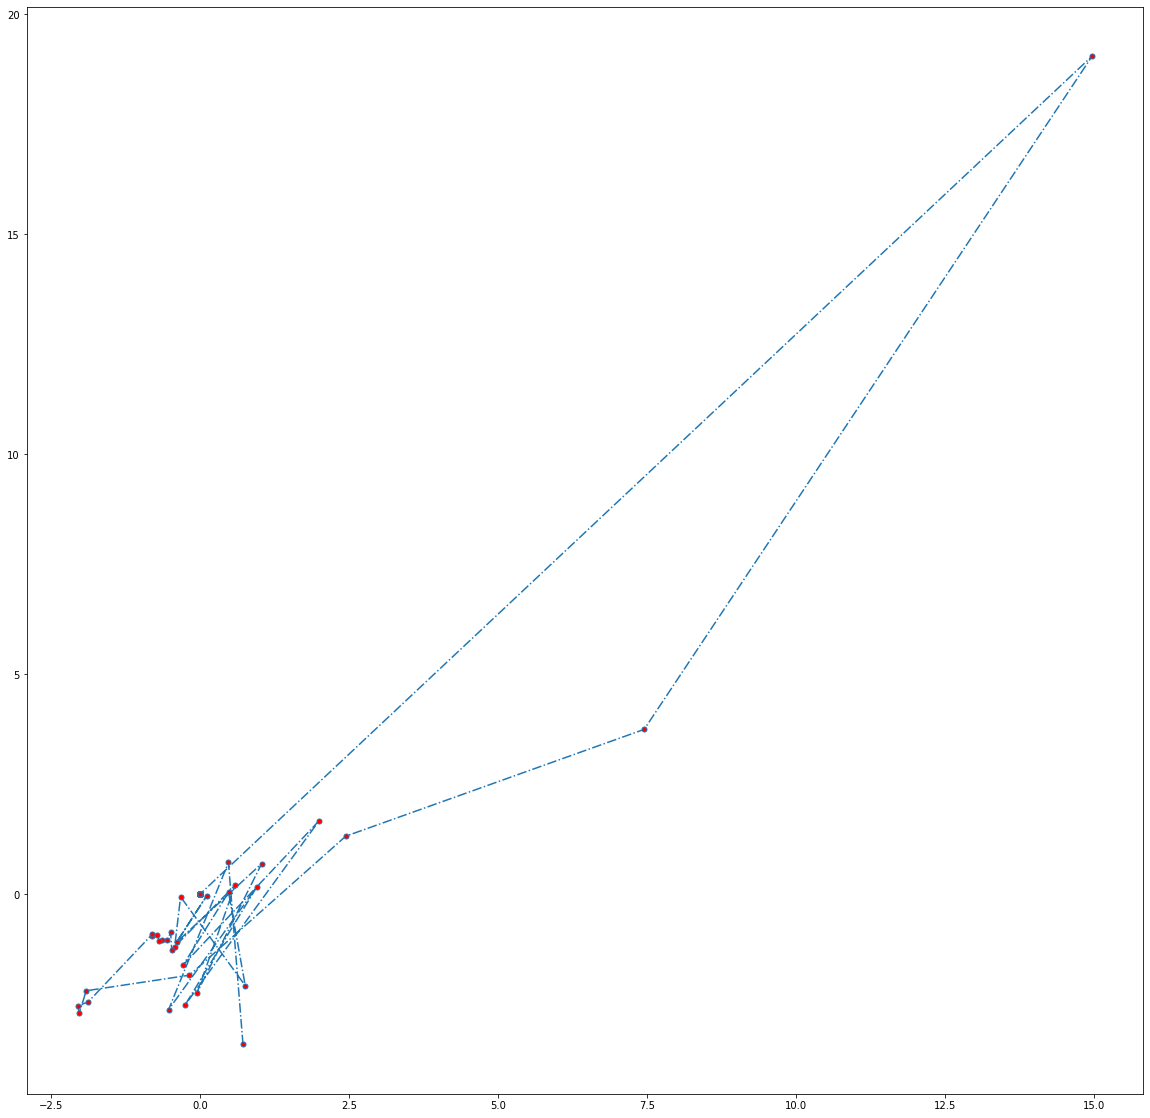

In [12]:
print("This is the original")
plt.figure(figsize=(20,20))
plt.plot(x_train[song_num][:, 0], x_train[song_num][:, 1], '-.o', markersize=5, markerfacecolor='red')
plt.show()

This is the reconstruction


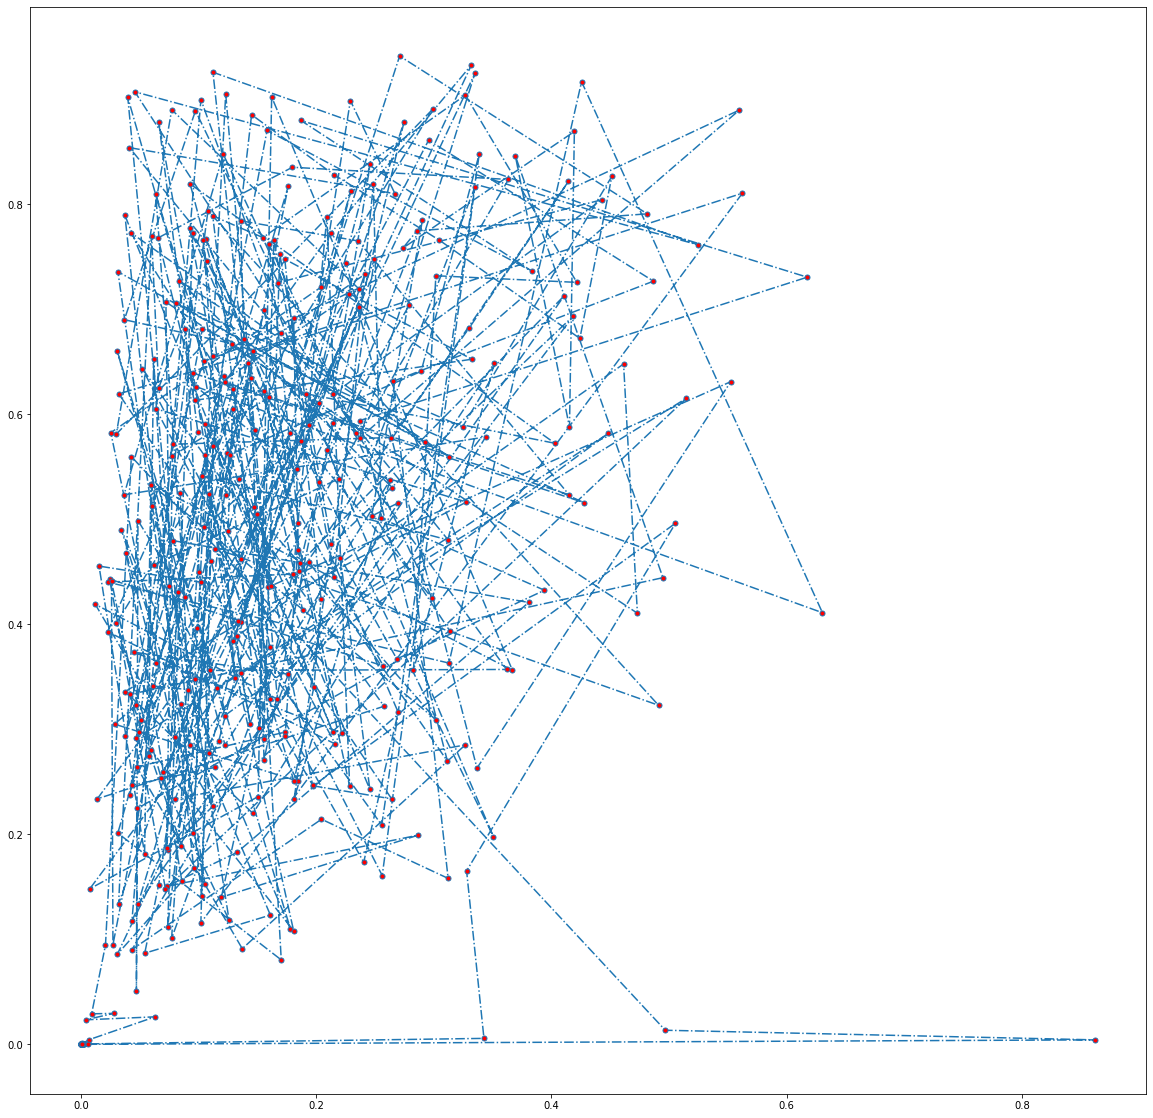

In [13]:
print("This is the reconstruction")
plt.figure(figsize=(20,20))
plt.plot(reconstructed_data[song_num][:, 0], reconstructed_data[song_num][:, 1], '-.o', markersize=5, markerfacecolor='red')
plt.show()